In [30]:
import sys
sys.path.append('../')

from TextLabeller import *

%matplotlib inline

In [31]:
DATA = get_sentences('data/emnlp_news.txt')

words = DATA

print(words[:10])



["My sources have suggested that so far the company sees no reason to change its tax structures , which are perfectly legal .                                                   \n'", "Sometimes I think about leaving sex work , but because I am alone living costs are really expensive ,' she said .", "We would open our main presents after lunch ( before the Queen ' s speech ) then take the dog for a walk .                                                 \n'", "I was then stuck in the house for nearly two years only going out for short periods of time ,' she said .", "I ' d say this is really the first time I ' ve had it in my career : how good I feel about my game and knowing where it ' s at .", 'In only one state , Utah , did more people say they supported giving states control , with 47 % of those questioned saying they did and 41 % saying they did not .', 'There was no immediate claim of responsibility for the attack , but analysts say it appears to be an attempt to prevent peace talks

min: 2, max: 49


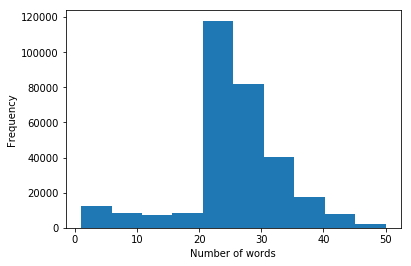

In [32]:
words_lens1 = [len(x.split()) for x in words]
print("min: {}, max: {}".format(min(words_lens), max(words_lens)))

# small = list(filter(lambda x : x < 20, words_lens))

# min_index = index

# print(len(small))

# print("min: {}, max: {}".format(min(small), max(small)))

import matplotlib.pyplot as plt

plt.hist(list(filter(lambda x : x >= 0, words_lens1)) )#, bins=20)
plt.title('')
plt.xlabel('Number of words')
plt.ylabel('Frequency')
plt.show()

In [33]:
# Read sentences from csv file 
FAKE_TEXT = "analysis_jaccard/jaccard_labelled_fake_text.csv"
REAL_TEXT = "analysis_jaccard/jaccard_labelled_real_text.csv"

import pandas as pd
fake_text = pd.read_csv(FAKE_TEXT, index_col=0)
real_text = pd.read_csv(REAL_TEXT, index_col=0)

fake_text.head(3)

,text,novelty,diversity,label
index,,,,
0,the scottish government has won and not necess...,0.718750,0.645161,0
1,the more of the main people do not to not pay ...,0.666667,0.586207,0
2,"it was a shame , but when they put it up for h...",0.676471,0.612903,0


4085
265824
min: 2, max: 49
[19, 5, 2, 10, 16, 9, 2, 2, 13, 8]
min: 2, max: 19


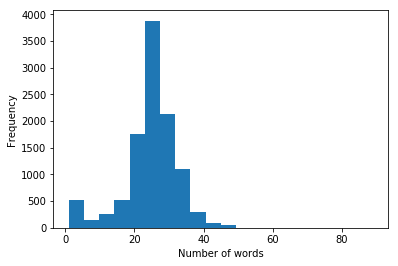

In [112]:
# sentences = fake_text['text'].str.split(' ').apply(len).value_counts().plot.hist()

# sentences.head(3)

words = [sentence for sentence in fake_text['text'].tolist()]

all_words = [word for sentence in fake_text['text'].tolist() for word in sentence.split()]

print(len(set(all_words)))

words_lens2 = [len(x.split()) for x in words]
print(sum(words_lens2))
print("min: {}, max: {}".format(min(words_lens), max(words_lens)))

small = list(filter(lambda x : x < 20, words_lens))

print(small[:10])

print("min: {}, max: {}".format(min(small), max(small)))

import matplotlib.pyplot as plt

plt.hist(list(filter(lambda x : x >= 0, words_lens2)), bins=20)
plt.title('')
plt.xlabel('Number of words')
plt.ylabel('Frequency')
plt.show()

min: 2, max: 49
[19, 5, 2, 10, 16, 9, 2, 2, 13, 8]
min: 2, max: 19


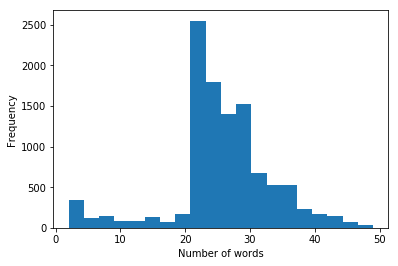

In [35]:
# sentences = fake_text['text'].str.split(' ').apply(len).value_counts().plot.hist()

# sentences.head(3)

words = [sentence for sentence in real_text['text'].tolist()]

# print(words[:10])

words_lens3 = [len(x.split()) for x in words]
print("min: {}, max: {}".format(min(words_lens), max(words_lens)))

small = list(filter(lambda x : x < 20, words_lens))

print(small[:10])

print("min: {}, max: {}".format(min(small), max(small)))

import matplotlib.pyplot as plt

plt.hist(list(filter(lambda x : x >= 0, words_lens3)), bins=20)
plt.title('')
plt.xlabel('Number of words')
plt.ylabel('Frequency')
plt.show()

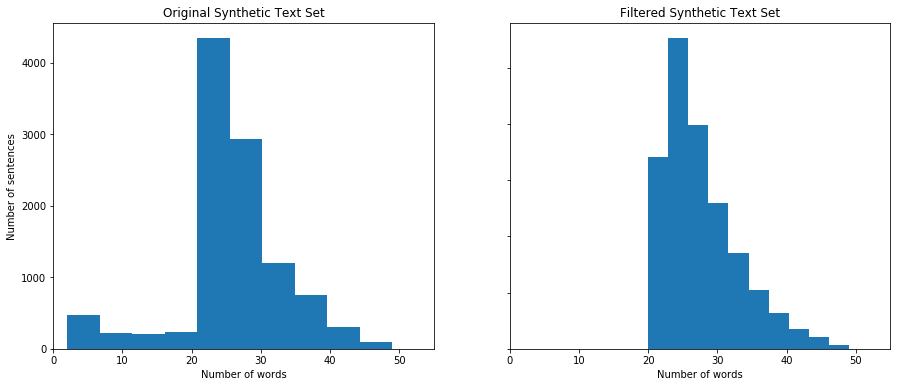

In [107]:
f, (ax1, ax2) = plt.subplots(1, 2)
ax1.hist(list(filter(lambda x : x >= 0, words_lens3)), bins=None )
# ax1.set_title('Real Text Corpus')
ax2.hist(list(filter(lambda x : x >= 20, words_lens3)), bins=None  )
# ax2.set_title('Processed Real Text Corpus')
ax2.set_xlim(0,55)
ax1.set_xlim(0,55)
# axarr[1, 0].hist(list(filter(lambda x : x >= 0, words_lens2*1)), bins=None  )
# axarr[1, 0].set_title('Original Dev Set')
# axarr[1, 1].hist(list(filter(lambda x : x >= 20, words_lens2*1)), bins=None  )
# axarr[1, 1].set_title('Filtered Dev Set')
# axarr[1, 0].hist(list(filter(lambda x : x >= 0, words_lens3*1)) , bins=None )
ax1.set_title('Original Synthetic Text Set')
# axarr[1, 1].hist(list(filter(lambda x : x >= 20, words_lens3*1)), bins=None  )
ax2.set_title('Filtered Synthetic Text Set')
for ax in (ax1, ax2):
    ax.set(ylabel='Number of sentences', xlabel='Number of words')
# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in (ax1, ax2):
    ax.label_outer()
    
f.set_figheight(6)
f.set_figwidth(15)

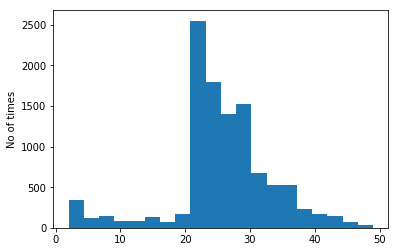

In [77]:
words = [len(x.split()) for x in real_text['text'].tolist()]

import matplotlib.pyplot as plt

plt.hist(words, bins=20)
plt.ylabel('No of times')
plt.show()

IndexError: too many indices for array

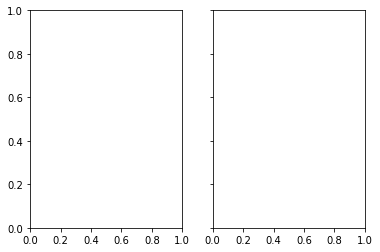

In [38]:
n_bins=100
colors = ["Real", "Fake"]
# plt.hist(jac_novs, n_bins, density=1, histtype='bar', stacked=True, label=colors)
# plt.legend(loc="upper right")

fig, axarr = plt.subplots(1, 2, sharex='col', sharey='row')

p1 = axarr[0, 0].hist(jac_novs, n_bins, density=1, histtype='bar', stacked=True, label=colors)
axarr[0, 0].set_title('Jaccard novelties')
p2 = axarr[0, 1].hist(lev_novs, n_bins, density=1, histtype='bar', stacked=True, label=colors)
axarr[0, 1].set_title('Levenshtein novelties')
p3 = axarr[0, 2].hist(wmd_novs, n_bins, density=1, histtype='bar', stacked=True, label=colors)
axarr[0, 2].set_title('WMD novelties')
p4 = axarr[1, 0].hist(jac_divs, n_bins, density=1, histtype='bar', stacked=True, label=colors)
axarr[1, 0].set_title('Jaccard diversities')
p5 = axarr[1, 1].hist(lev_divs, n_bins, density=1, histtype='bar', stacked=True, label=colors)
axarr[1, 1].set_title('Levenshtein diversities')
p6 = axarr[1, 2].hist(wmd_divs, n_bins, density=1, histtype='bar', stacked=True, label=colors)
axarr[1, 2].set_title('WMD diversities')

line_labels = colors
fig.legend([p1, p6],     # The line objects
           labels=line_labels,   # The labels for each line
           loc="upper right",   # Position of legend
           borderaxespad=0.1,    # Small spacing around legend box
           title="Legend Title"  # Title for the legend
           )

fig.set_figheight(10)
fig.set_figwidth(15)

for ax in axarr.flat:
    ax.set(ylabel='Probability density')
# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axarr.flat:
    ax.label_outer()